# Module 3, Activity 1: Fonts and Styles

Here, we're going to explore different aesthetic options for including text in your visualisations. We're going to use Pyplot here, but what we're learning can be transferred pretty easily to other plotting libraries built off Matplotlib. Let's set up first, then we'll be picking up where we left off in the last model, with a time series of total fares through time by borough.

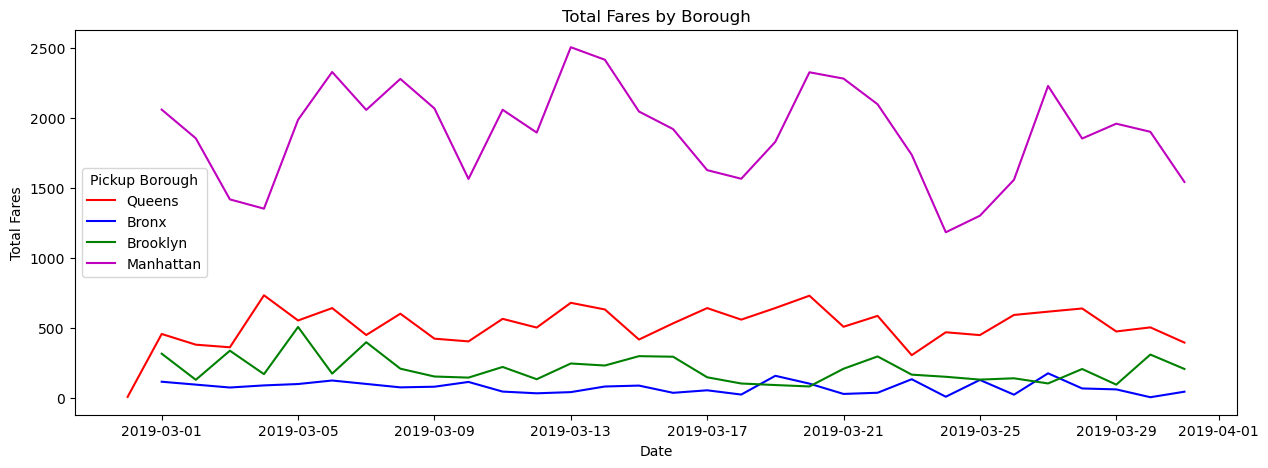

In [264]:
# import packages/libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt

# load (and optionally format) dataset
df = pd.read_csv("data/taxis.csv")
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])

# Add a new column, giving the duration of each trip in minutes
duration = df["dropoff"]-df["pickup"] #calculating trip duration as timedelta datatype
df["duration_min"] = duration.dt.total_seconds()/60 #converting to minutes and adding to df

df_gb=df.groupby(by=[pd.Grouper(key="pickup",freq="D"),'pickup_borough'])
df_gb_sum=df_gb.sum().reset_index()

label_names = ["Queens", "Bronx", "Brooklyn", "Manhattan"]

df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
ax.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5))
plt.show()

## Recap

We already started improving the aesthetics of this figure, remember? First, we changed the size of the figure, then moved the legend so it's not obscuring any of the lines. We've also added grid lines to our plot. Let's focus on these improvements, and other things we can do with this figure, in the Exercises below.

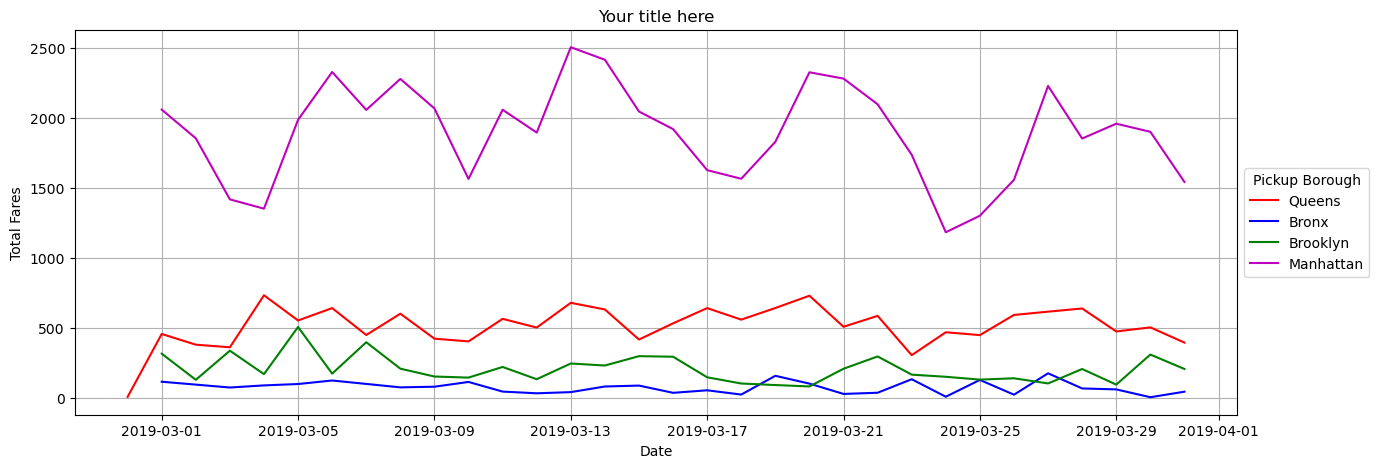

In [266]:
#label_names = [ "Queens", "Bronx", "Brooklyn", "Manhattan"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Your title here")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
ax.grid(True)
ax.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5)) # Move legend outside of axes
plt.show()


**Exercises:**
1) Experiment with the figure width and height.\
2) Experiment with the location of the legend, by changing **loc** and the **bbox_to_anchor** coordinates. This [website](https://www.statology.org/matplotlib-legend-position/) has an easy to read summary of what these two variables are doing. The [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) is also helpful.\
3) Explore the options available in **plt.figure** [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), try changing the background colour of the plot. Explain why the default white is probably the best option for this visualisation.\
4) We can change the line attributes for each borough, by calling **linestyle** or **linewidth** inside each **plt.plot** command. A full list of linestyles in Matplotlib are available [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py). Modify the Manhattan line in the above figure, so that it has a linewidth of 2 and a dashed linestyle. \
5) Continuing from 4, what if we want to highlight the Manhattan data? What colours and linestyles would you choose for the different boroughs? Implement your decision using what you've learned so far.\
6) We've left the title of this figure for you to write. Remember, plot titles are only useful if they say something concise about the figure that helps guide your audience to see what you want them to see. Write a title for this plot with this in mind, continuing with our goal to highlight the Manhattan data. 

## Fonts and Text Positions

The default fonts in Python are okay for exploratory analysis, but they're not that audience-friendly. Generally, the bigger your font size, the better (within reason of course). If your audience has to squint to see what's happening in your visualisation, it's not an effective figure. So, let's look at what we can do with text fonts and positions with Matplotlib.

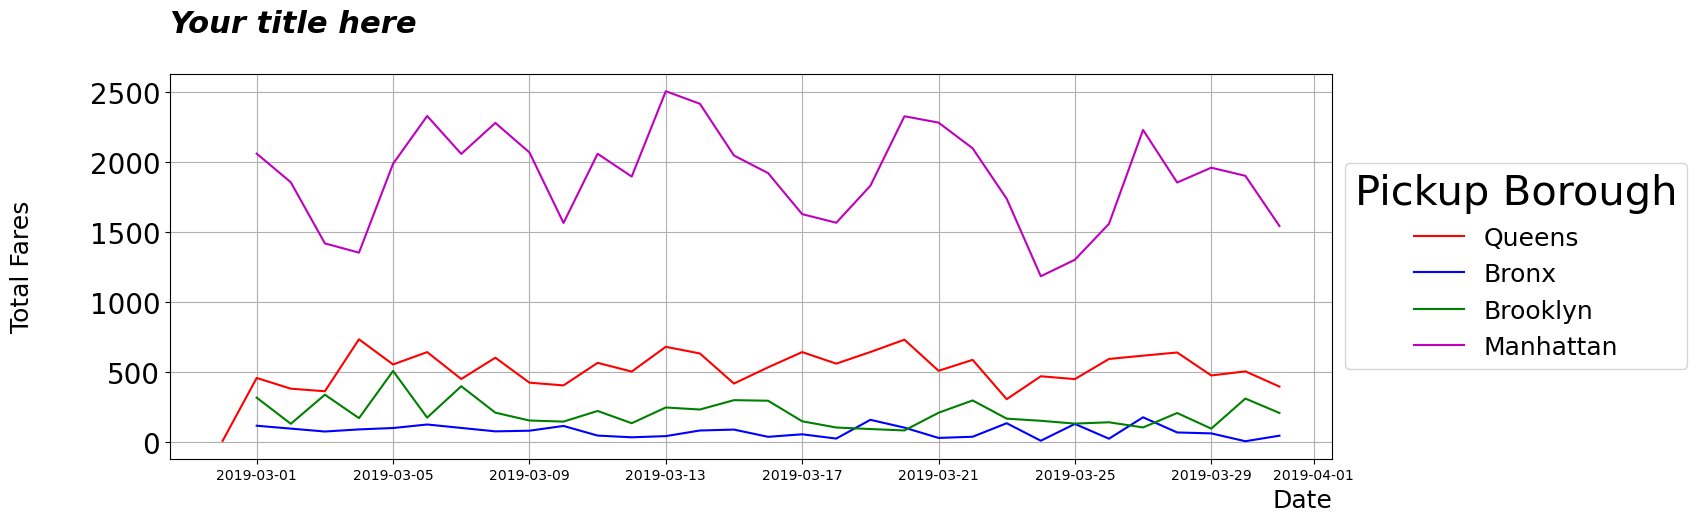

In [284]:
#label_names = [ "Queens", "Bronx", "Brooklyn", "Manhattan"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
ax.set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
ax.set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
ax.grid(True)
ax.tick_params(axis = "y", labelsize=20)
plt.legend([plt1, plt2, plt3, plt4],
           label_names,
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5), fontsize = 18, title_fontsize = 30) # Move legend outside of axes

plt.show()

**Exercise:** In the figure above, there are **>10** customisations to the figure above across the title, axes and positions. Identify and modify each one, and a short comment for each one in the code describing what it does. Use [this reference page](https://matplotlib.org/stable/tutorials/text/text_intro.html) as a starting point to help describe what each customisation is doing. You can use other websites as you need as well.

## Axis Ticks and Shared Legends

The x and y-axis 'ticks' are the markers on your x and y-axes. In our time series, our y-axis ticks go from 0 to 2500 in increments of 500. Our x-axis ticks our dates, going from 01 March 2019 to 01 April 2019. We can't increase the font size of our x-axis ticks too much as they are by default, or they'll overlap. So, we're going to use Matplotlib's **dates** function to change the format and frequency of x-axis date labels. The official documentation for the **dates** function is [here](https://matplotlib.org/stable/api/dates_api.html). It's quite complicated, with a lot of functionality we don't need at the moment. A gentler introduction to what we're doing can be found [here](https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/). 

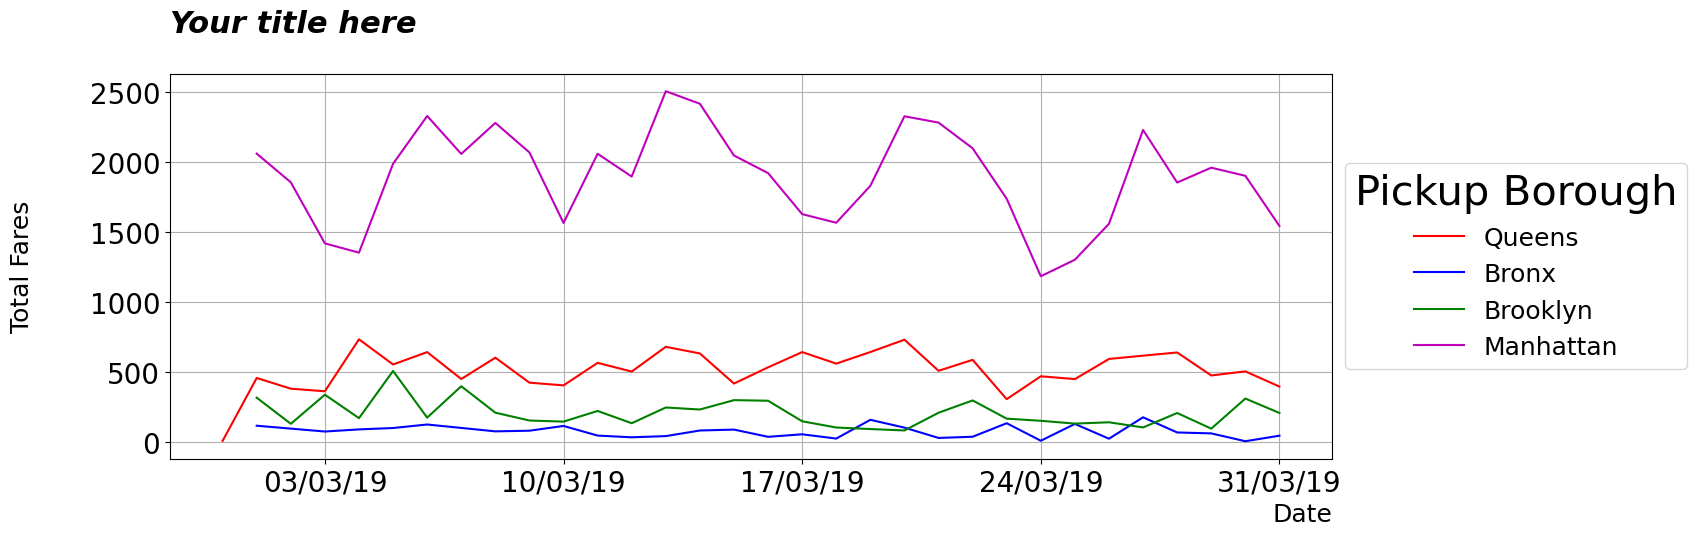

In [285]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

#label_names = [ "Queens", "Bronx", "Brooklyn", "Manhattan"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
ax.set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
ax.set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
ax.grid(True)
ax.tick_params(axis = "y", labelsize=20)
plt.legend([plt1, plt2, plt3, plt4],
           label_names,
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5), fontsize = 18, title_fontsize = 30) # Move legend outside of axes

## First change the format of the dates. Note the plt.gca() command we need to run first, 
## gca stands for 'get current axes'. It allows us to access the underlying Axes that 
## we're building on in Matplotlib. We need to access the underlying Axes to modify the 
## format of the x-axis ticks.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))

## Then change the frequency
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

## Now we can increase the font size
ax.tick_params(axis = "x", labelsize=20)

plt.show()

**Exercise:** Change the date format and frequency of the x-axis tick labels in the figure above. Change the other axis, legend and title text properties as desired as well.

What if we didn't want tick labels? Easy, we can set the tick labels to be an empty array:

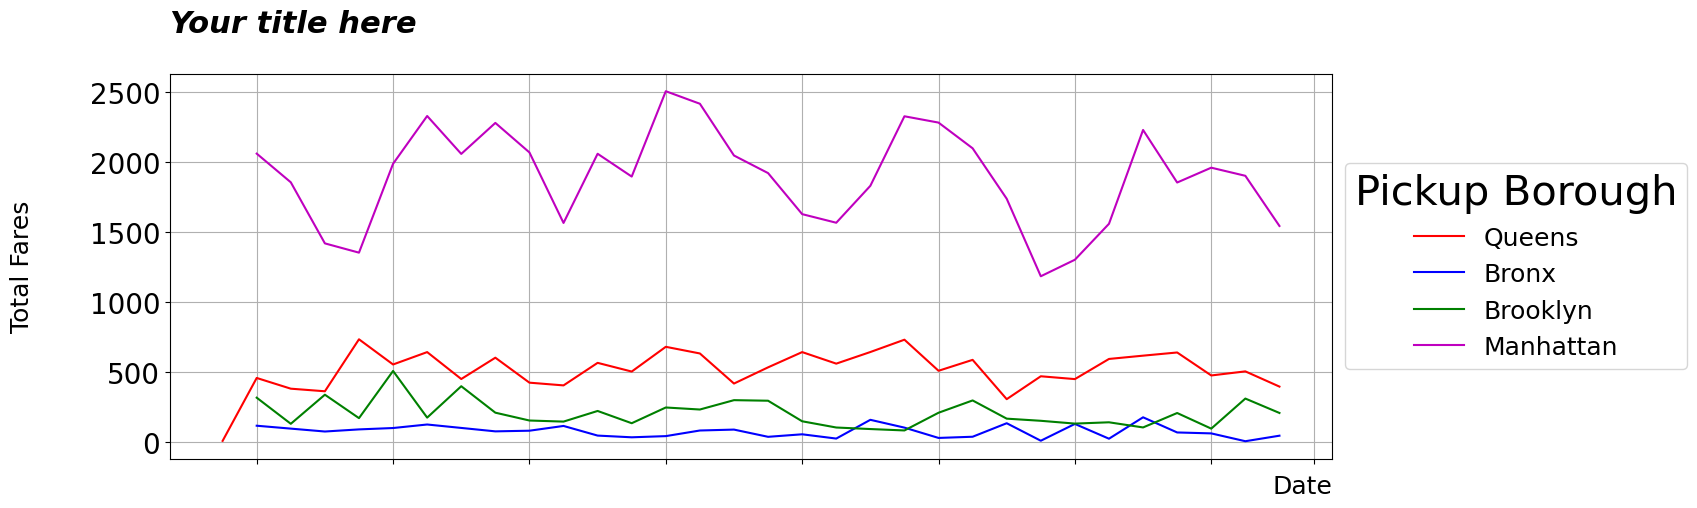

In [287]:
#label_names = [ "Queens", "Bronx", "Brooklyn", "Manhattan"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
ax.set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
ax.set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
ax.grid(True)
ax.tick_params(axis = "y", labelsize=20)
plt.legend([plt1, plt2, plt3, plt4],
           label_names,
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5), fontsize = 18, title_fontsize = 30) # Move legend outside of axes

ax.xaxis.set_ticklabels([])

plt.show()

Generally, we wouldn't remove tick labels. But, if we had two plots in the same figure, one on top and one on the bottom with the same variables, it can look neater to only have x-tick labels on the bottom plot. Let's see what this looks like, by splitting the plot above in two.

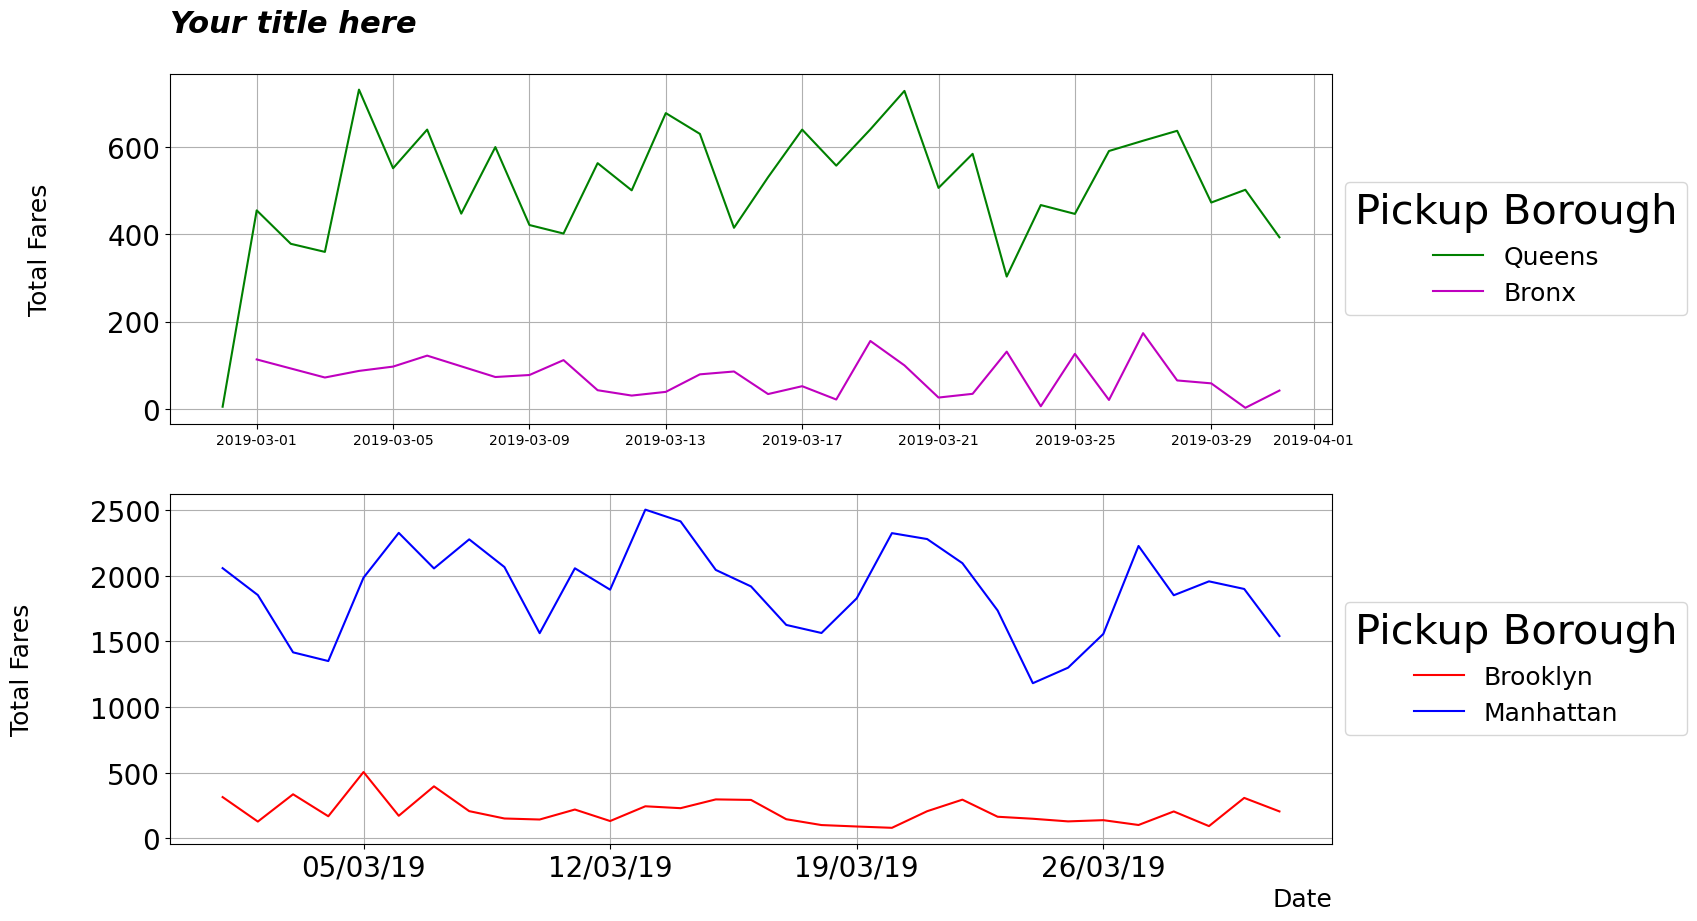

In [290]:
#label_names = [ "Queens", "Bronx", "Brooklyn", "Manhattan"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]


fig, axs = plt.subplots(2,1, figsize=(15,10)) # Two rows, one column. Note we've doubled the height of the figure
## Plot one
plt1, = axs[0].plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "g", label = label_names[0])
plt2, = axs[0].plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "m", label = label_names[1])
axs[0].set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
axs[0].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[0].grid(True)
axs[0].tick_params(axis = "y", labelsize=20)
axs[0].legend([plt1, plt2],
           label_names[0:2],
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5), fontsize = 18, title_fontsize = 30) 

## Plot two
plt.subplot(2,1,2)
plt3, = axs[1].plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "r", label = label_names[2])
plt4, = axs[1].plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "b", label = label_names[3])
axs[1].set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
axs[1].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[1].grid(True)
axs[1].tick_params(axis = "y", labelsize=20)
axs[1].legend([plt3, plt4],
           label_names[2:4],
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5), fontsize = 18, title_fontsize = 30)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[1].tick_params(axis = "x", labelsize = 20)

plt.show()

But this doesn't look right - the x-axis grid lines don't match in the top and bottom figure. We could fix this by specifying the x-axis tick aesthetics we want in plot 1 and then sharing them to plot two. In plot 1, we also want to switch off the x-axis tick labels. We've done these steps in the code below.

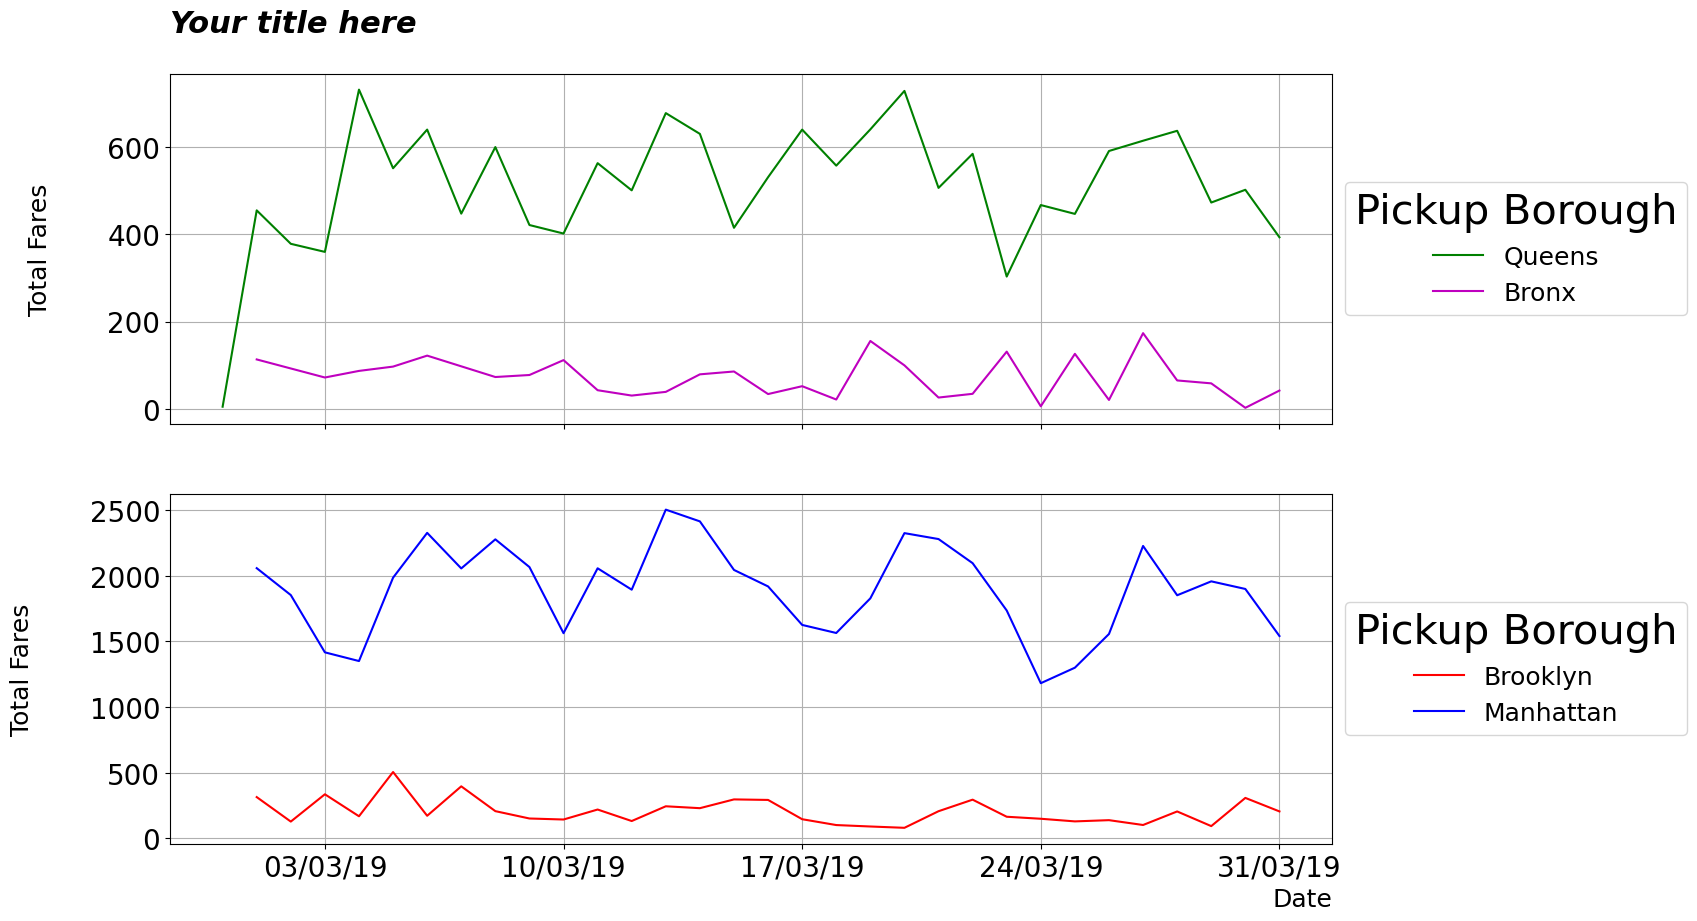

In [294]:
#label_names = [ "Queens", "Bronx", "Brooklyn", "Manhattan"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]


fig, axs = plt.subplots(2,1, figsize=(15,10), sharex=True) 
## Plot one
plt1, = axs[0].plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "g", label = label_names[0])
plt2, = axs[0].plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "m", label = label_names[1])
axs[0].set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
axs[0].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[0].grid(True)
axs[0].tick_params(axis = "y", labelsize=20)
axs[0].legend([plt1, plt2],
           label_names[0:2],
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5), fontsize = 18, title_fontsize = 30) 

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[0].xaxis.set_ticklabels([])

## Plot two
plt.subplot(2,1,2)
plt3, = axs[1].plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "r", label = label_names[2])
plt4, = axs[1].plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "b", label = label_names[3])
axs[1].set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
axs[1].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[1].grid(True)
axs[1].tick_params(axis = "y", labelsize=20)
axs[1].legend([plt3, plt4],
           label_names[2:4],
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5), fontsize = 18, title_fontsize = 30)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[1].tick_params(axis = "x", labelsize = 20)

plt.show()

**Exercise:** Identify where in the code above we have done the following:\
        a) Made the x-axis tick labels in the first plot invisible.\
        b) Specified that we want the all plots to share the same x-axis limits and ticks.

Finally, can we share the legend? Yes. We just need to specify all the line objects and their names, and move the shared legend to be between the two plots, using **box_to_anchor**.

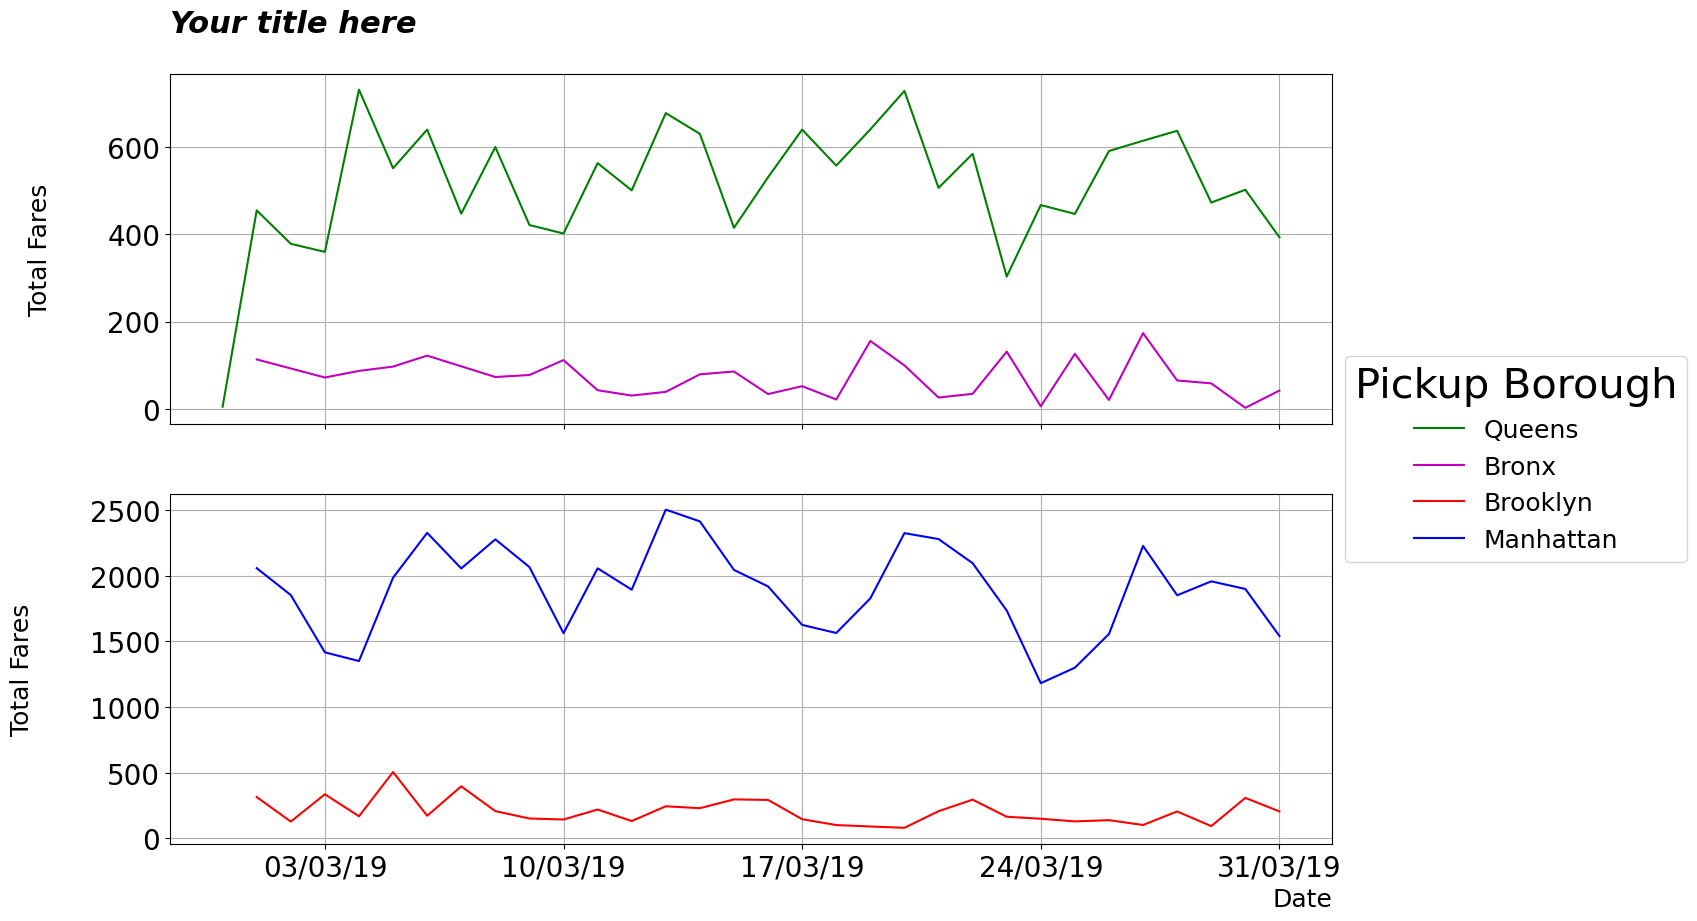

In [295]:
#label_names = [ "Queens", "Bronx", "Brooklyn", "Manhattan"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, axs = plt.subplots(2,1, figsize=(15,10), sharex=True) 
## Plot one
plt1, = axs[0].plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "g", label = label_names[0])
plt2, = axs[0].plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "m", label = label_names[1])
axs[0].set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
axs[0].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[0].grid(True)
axs[0].tick_params(axis = "y", labelsize=20)

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[0].xaxis.set_ticklabels([])

## Plot two
plt.subplot(2,1,2)
plt3, = axs[1].plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "r", label = label_names[2])
plt4, = axs[1].plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "b", label = label_names[3])
axs[1].set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
axs[1].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[1].grid(True)
axs[1].tick_params(axis = "y", labelsize=20)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[1].tick_params(axis = "x", labelsize = 20)

## Shared legend, positioned with respect to subplot 2 (axs[1])
axs[1].legend([plt1, plt2, plt3, plt4], # The line objects
                 label_names, # Their names
                 title = "Pickup Borough", 
                 loc = "center left", bbox_to_anchor = (1,1.1),
                fontsize = 18, title_fontsize = 30)
plt.show()

Finally, what about the y-axis tick marks? The bottom figure's y-axis looks okay, but the top figure is a bit sparse. Let's alter the frequency of the y-axis tick marks in the top figure from every 200, to every 100. 

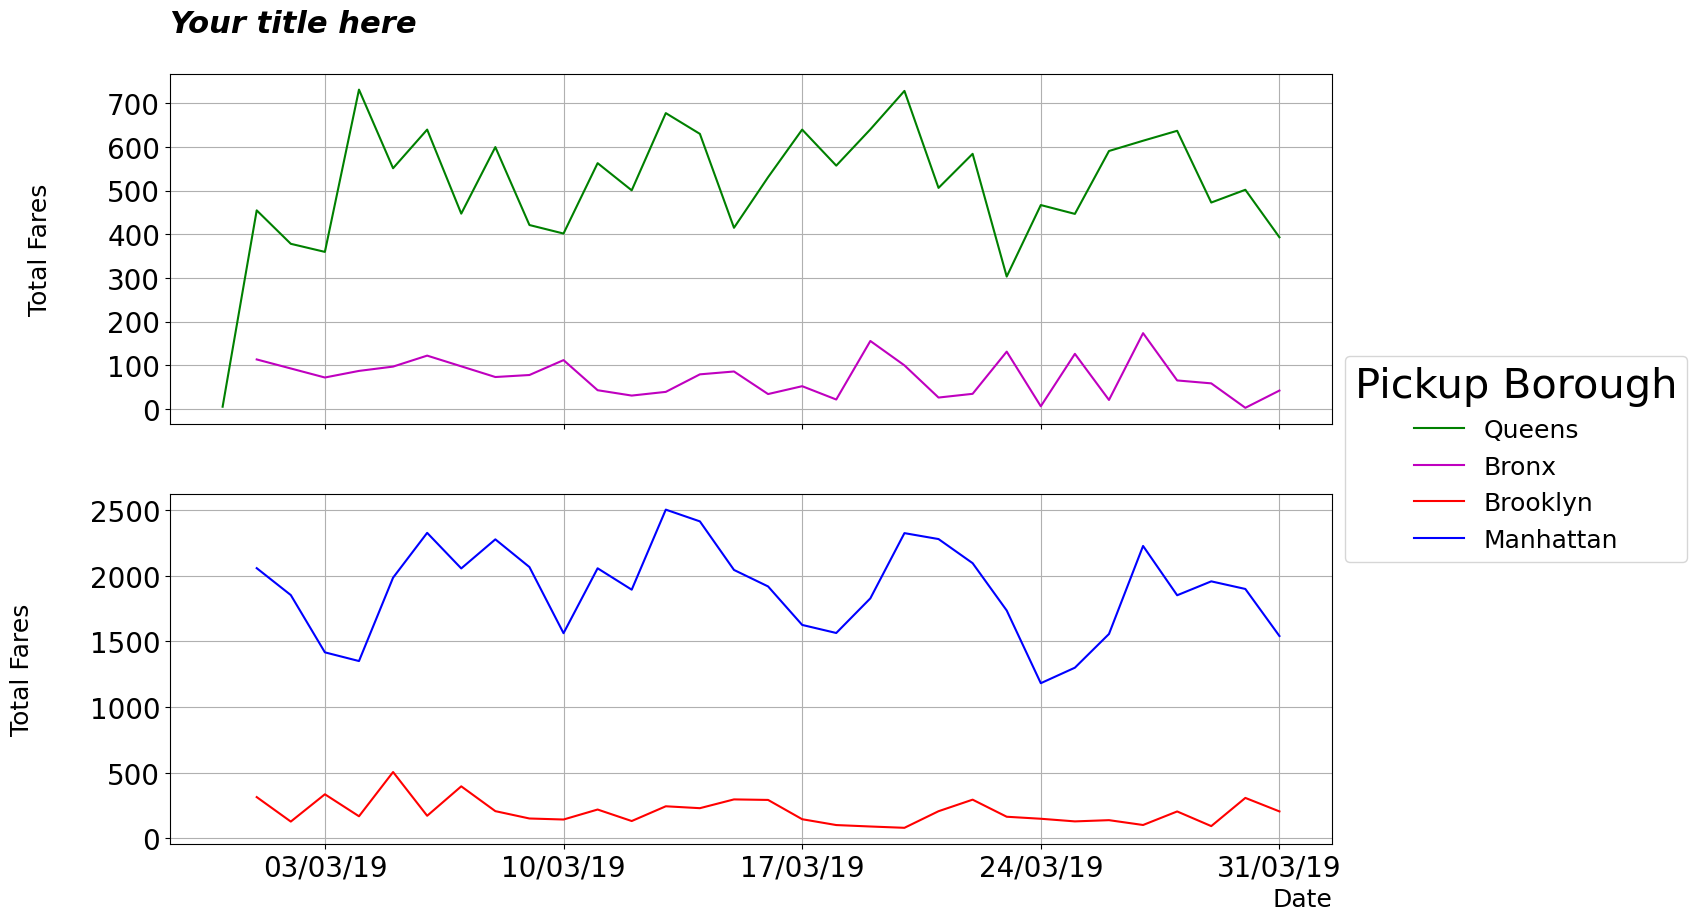

In [298]:
#label_names = [ "Queens", "Bronx", "Manhattan", "Brooklyn"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, axs = plt.subplots(2,1, figsize=(15,10), sharex=True) 
## Plot one
plt1, = axs[0].plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "g", label = label_names[0])
plt2, = axs[0].plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "m", label = label_names[1])
axs[0].set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
axs[0].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[0].grid(True)
axs[0].tick_params(axis = "y", labelsize=20)

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[0].xaxis.set_ticklabels([])

axs[0].yaxis.set_ticks(np.arange(0, 751, 100))


## Plot two
plt.subplot(2,1,2)
plt3, = axs[1].plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "r", label = label_names[2])
plt4, = axs[1].plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "b", label = label_names[3])
axs[1].set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
axs[1].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[1].grid(True)
axs[1].tick_params(axis = "y", labelsize=20)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[1].tick_params(axis = "x", labelsize = 20)

## Shared legend, positioned with respect to subplot 2 (axs[1])
axs[1].legend([plt1, plt2, plt3, plt4], # The line objects
                 label_names, # Their names
                 title = "Pickup Borough", 
                 loc = "center left", bbox_to_anchor = (1,1.1),
                fontsize = 18, title_fontsize = 30)
plt.show()

**Exercises:** 
1) In the code above, identify the line where we have changed the frequency of the y-axis tick marks in the second figure. We use the [**np.arrange**](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) function to create a sequence of numbers where we want to place y-axis tick labels. Experiment with this function to alter the location and frequency of the tick labels. \
2) It's best practice with legends for the legend items to be in a reasonable order. Here, Brooklyn is before Manhattan, even though Manhattan appears first in the second plot. Rearrange the legend so that Manhattan appears first. **HINT:** Uncomment and modify the code at the top of the last script we just worked through.

## Styles

Similar to fonts, Matplotlib has a range of built-in plot styles that change the appearance of your figure. So far, we haven't specified a plot style, so Matplotlib has been using its default style settings. But, let's see what other styles are available [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

We can get the names of all style types like this:

In [299]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


[Fivethirtyeight](https://fivethirtyeight.com/) is a website focussed on statistical analysis of opinion polling, with a focus on the USA. The website has a distinct plotting style that's also available in Matplotlib. Let's plot a scatter plot of distance versus total fare, with colours by payment type, in the Fivethirtyeight style:

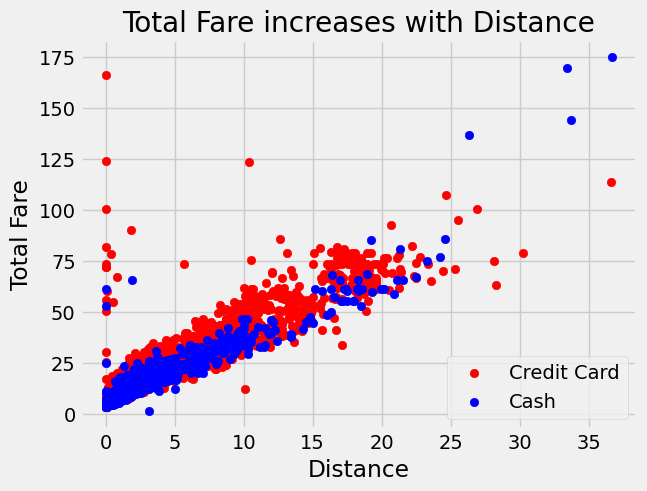

In [300]:
df_card = df[df.payment == "credit card"]
df_cash = df[df.payment == "cash"]

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax.scatter(df_card.distance, df_card.total, c = "r")
ax.scatter(df_cash.distance, df_cash.total, c = "b")
ax.set_xlabel("Distance")
ax.set_ylabel("Total Fare")
ax.set_title("Total Fare increases with Distance")
ax.legend(["Credit Card", "Cash"])
plt.show()

plt.style.use('default')

You'll notice after **plt.show()** we explicitly return to the default plotting style. You should do this at the end of your plotting scripts, when you're finished with a non-default style.

You can also combine multiple styles for a single figure. Let's combine the Fivethirtyeight style with dark_background.

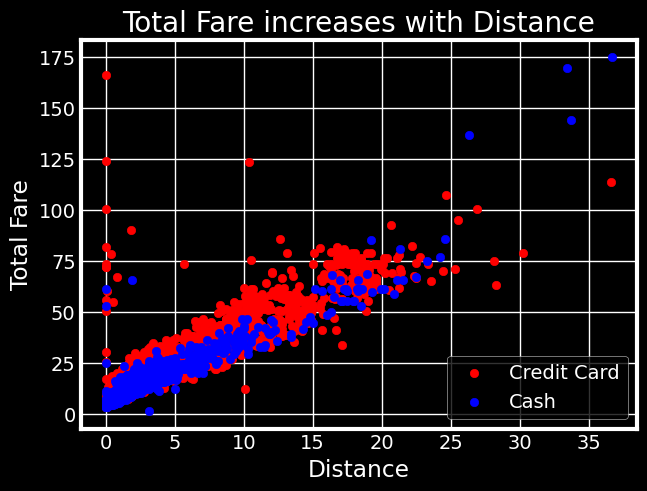

In [301]:
#df_card = df[df.payment == "credit card"]
#df_cash = df[df.payment == "cash"]

plt.style.use(['fivethirtyeight', 'dark_background'])

fig, ax = plt.subplots()
ax.scatter(df_card.distance, df_card.total, c = "r")
ax.scatter(df_cash.distance, df_cash.total, c = "b")
ax.set_xlabel("Distance")
ax.set_ylabel("Total Fare")
ax.set_title("Total Fare increases with Distance")
ax.legend(["Credit Card", "Cash"])
plt.show()

plt.style.use('default')

**Exercise:** Experiment with different pre-built styles.  

We can also create our own temporary style. We were actually doing this before with the time series figure - modifying axis, title and legend text size and font, and adding grid lines. We can do all of this before hand, using **rcParams.update**, which changes the runtime configuration (rc) default style as we specify. All the customisable options, and their default settings can be seen [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-default-matplotlibrc-file). 

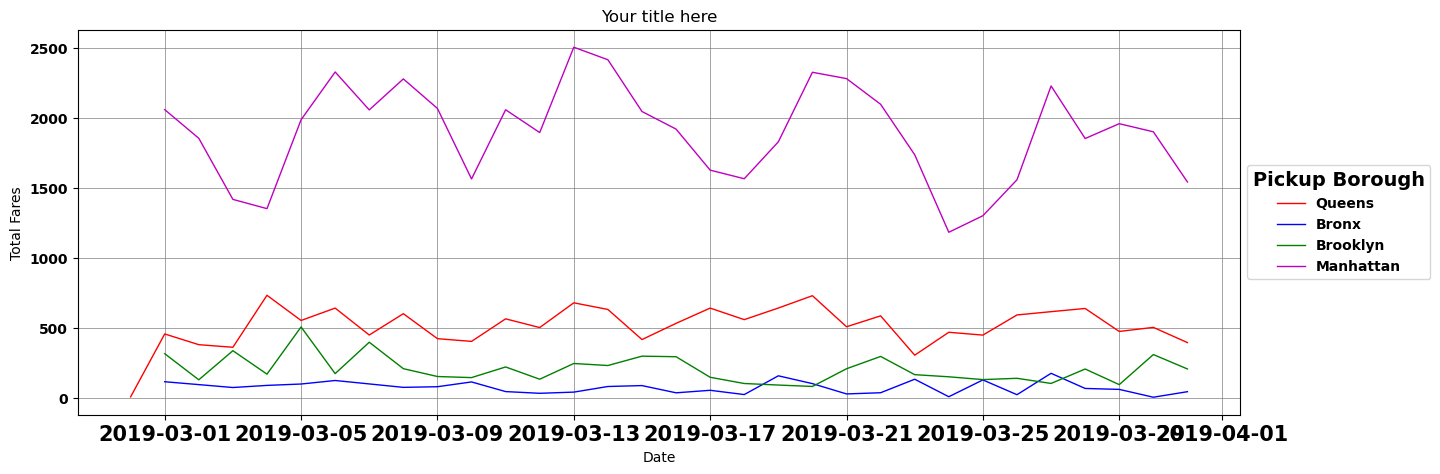

In [302]:
def set_pub(): ## Define 'def' a function with style features
    matplotlib.rcParams.update({
        "font.weight": "bold",  # bold fonts
        "xtick.labelsize": 15,   # large tick labels
        "lines.linewidth": 1,   # thick lines
        "lines.color": "k",     # black lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "legend.title_fontsize": 14 # legend title font size
    })
    
set_pub()

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Your title here")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
ax.grid(True)
ax.tick_params(axis = "y")
plt.legend([plt1, plt2, plt3, plt4],
           label_names,
          title = "Pickup Borough", loc = "center left", 
           bbox_to_anchor = (1,0.5)) # Move legend outside of axes

plt.show()
matplotlib.rcdefaults()  # restore the default style

This is a bit of overkill where you only have a single figure, but it becomes very helpful where you need to specify axis font sizes across multiple figures.  

**Exercise:** Modify the figure code below, so that all of the axis title and label text stylings are modified with **rcParams.update**, and not within the code for each plot. Use the default styling list [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-default-matplotlibrc-file) to look up the names of the variables you need to update.

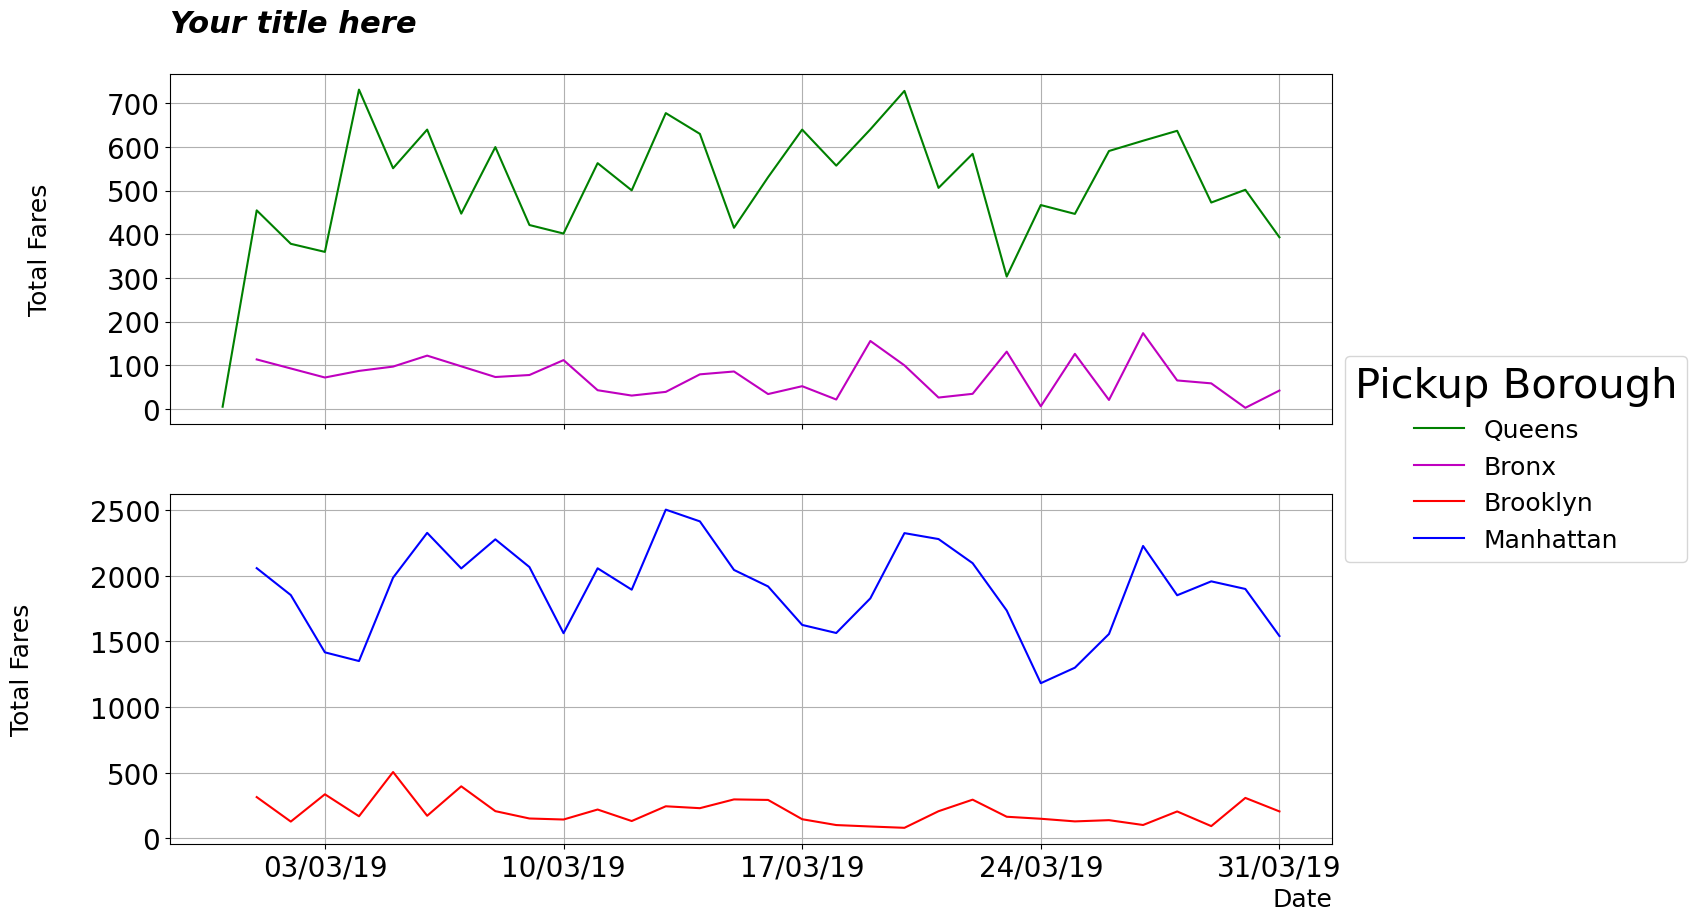

In [303]:
#label_names = [ "Queens", "Bronx", "Manhattan", "Brooklyn"]

#df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
#df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
#df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
#df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, axs = plt.subplots(2,1, figsize=(15,10), sharex=True) 
## Plot one
plt1, = axs[0].plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "g", label = label_names[0])
plt2, = axs[0].plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "m", label = label_names[1])
axs[0].set_title("Your title here", fontsize = 22, fontweight = "bold", style = "italic", loc = "left", pad = 30)
axs[0].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[0].grid(True)
axs[0].tick_params(axis = "y", labelsize=20)

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[0].xaxis.set_ticklabels([])

axs[0].yaxis.set_ticks(np.arange(0, 751, 100))


## Plot two
plt.subplot(2,1,2)
plt3, = axs[1].plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "r", label = label_names[2])
plt4, = axs[1].plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "b", label = label_names[3])
axs[1].set_xlabel("Date", fontsize = 18, position=(1, 0), horizontalalignment='right')
axs[1].set_ylabel("Total Fares", fontsize = 18, labelpad = 40)
axs[1].grid(True)
axs[1].tick_params(axis = "y", labelsize=20)

axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=7))
axs[1].tick_params(axis = "x", labelsize = 20)

## Shared legend, positioned with respect to subplot 2 (axs[1])
axs[1].legend([plt1, plt2, plt3, plt4], # The line objects
                 label_names, # Their names
                 title = "Pickup Borough", 
                 loc = "center left", bbox_to_anchor = (1,1.1),
                fontsize = 18, title_fontsize = 30)
plt.show()